# Bank Loan Defaulter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Basic Information about the dataset

In [2]:
df = pd.read_csv("train.csv")
a = df.info()
b = df.shape
print("These are the information about the dataset",a)
print("\n\n\n\n")
print("The size of the dataset is ",b)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419040 entries, 0 to 419039
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          419040 non-null  object 
 1   time        397052 non-null  object 
 2   duration    419040 non-null  object 
 3   feature_0   419040 non-null  float64
 4   checkpoint  419040 non-null  object 
 5   feature_1   419040 non-null  object 
 6   feature_2   419040 non-null  float64
 7   feature_3   419040 non-null  object 
 8   feature_4   357082 non-null  object 
 9   feature_5   419040 non-null  float64
 10  feature_6   419040 non-null  float64
 11  feature_7   419040 non-null  float64
 12  feature_8   419040 non-null  float64
 13  feature_9   394776 non-null  object 
 14  feature_10  419040 non-null  int64  
 15  feature_11  419040 non-null  float64
 16  feature_12  419040 non-null  object 
 17  feature_13  419040 non-null  object 
 18  feature_14  419040 non-null  object 
 19  fe

On inspecting the dataset we can see that feature 10 and feature 11 are same. Similarly 

In [3]:
df.describe()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
count,419040.000000,4.190400e+05,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,...,419040.000000,419040.000000,4.190400e+05,418857.000000,4.190400e+05,4.190400e+05,419040.000000,419040.000000,4.190400e+05,419040.000000
mean,0.005329,7.548509e+04,4.141652,0.015765,0.328026,18.504864,14997.521418,14991.218903,0.669521,13.299535,...,0.208169,39.961678,1.712163e+04,55.223681,2.358979e+02,1.395292e+05,1692.512609,0.321974,3.205100e+04,25.510887
std,0.079510,6.460105e+04,51.673850,0.142355,0.879557,23.368626,8445.489865,8442.098986,0.956271,4.410936,...,0.587265,377.826759,2.226594e+04,23.481539,1.425897e+04,1.540478e+05,2009.691720,3.634503,3.557288e+04,11.844083
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,925.000000,0.000000,5.320000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.000000
25%,0.000000,4.600000e+04,0.000000,0.000000,0.000000,12.180000,8400.000000,8400.000000,0.000000,9.990000,...,0.000000,0.000000,6.579000e+03,38.000000,0.000000e+00,2.985775e+04,421.730000,0.000000,1.400000e+04,17.000000
50%,0.000000,6.500000e+04,0.000000,0.000000,0.000000,17.970000,13500.000000,13500.000000,0.000000,12.990000,...,0.000000,0.000000,1.202500e+04,56.000000,0.000000e+00,8.061050e+04,1037.570000,0.000000,2.370000e+04,24.000000
75%,0.000000,9.000000e+04,0.000000,0.000000,0.000000,24.360000,20000.000000,20000.000000,1.000000,16.290000,...,0.000000,0.000000,2.106000e+04,73.400000,0.000000e+00,2.081768e+05,2168.445000,0.000000,3.980000e+04,32.000000
max,6.000000,9.000000e+06,5694.093600,20.000000,27.000000,9999.000000,35000.000000,35000.000000,7.000000,28.990000,...,49.000000,33520.270000,2.560703e+06,166.900000,9.152545e+06,8.000078e+06,21625.990000,242.550000,9.999999e+06,156.000000


In [4]:
.3/(df["id"])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
            ... 
feature_8    NaN
feature_9    NaN
id           NaN
target       NaN
time         NaN
Length: 419082, dtype: object

Checking the distribution of the target variable

count    419040.000000
mean         25.510887
std          11.844083
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         156.000000
Name: target, dtype: float64


C:\Users\prith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

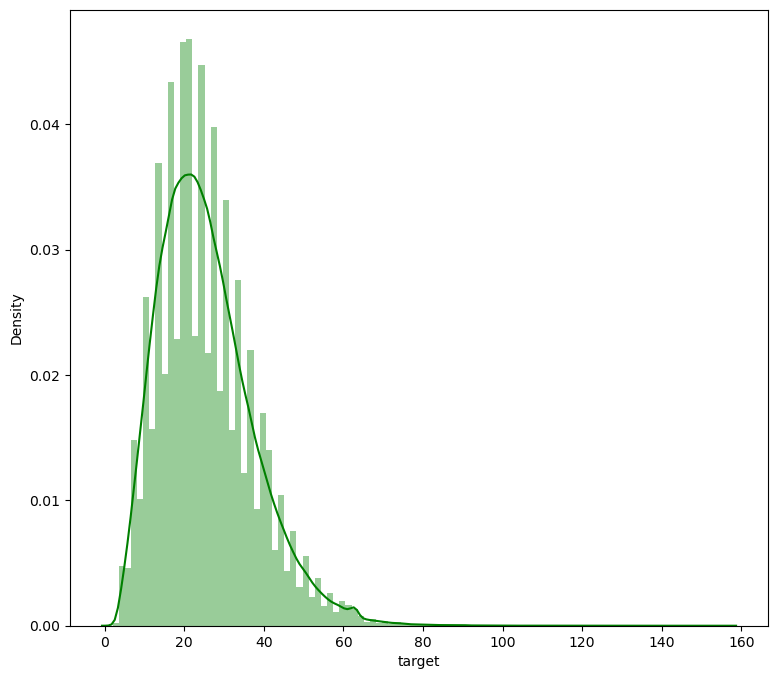

In [5]:
print(df['target'].describe())
plt.figure(figsize = (9,8))
sns.distplot(df['target'],color = 'g',bins = 100,hist_kws = {'alpha':0.4})

To know the various datatypes in the dataset and to plot the distribution of the numerical variables of the lot

In [6]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
0,0.0,130000.0,0.0,0.0,0.0,18.89,25000,25000.0,4.0,17.57,...,0.0,0.0,34018.0,91.0,0.0,39779.0,5701.17,0.0,37400.0,28.0
1,0.0,50000.0,0.0,0.0,3.0,27.12,5000,5000.0,3.0,16.55,...,0.0,0.0,24808.0,50.6,138.0,115674.0,11.84,0.0,49000.0,39.0
2,0.0,40000.0,0.0,0.0,0.0,27.87,12500,12500.0,0.0,12.99,...,0.0,0.0,12417.0,70.6,0.0,40075.0,1689.09,0.0,17600.0,29.0
3,0.0,50000.0,0.0,0.0,1.0,18.24,21000,20950.0,3.0,22.99,...,0.0,0.0,2105.0,10.5,0.0,20459.0,348.68,0.0,20100.0,15.0
4,0.0,45000.0,0.0,0.0,0.0,13.31,9500,9500.0,0.0,14.09,...,1.0,0.0,10917.0,72.8,0.0,100987.0,2164.96,0.0,15000.0,18.0


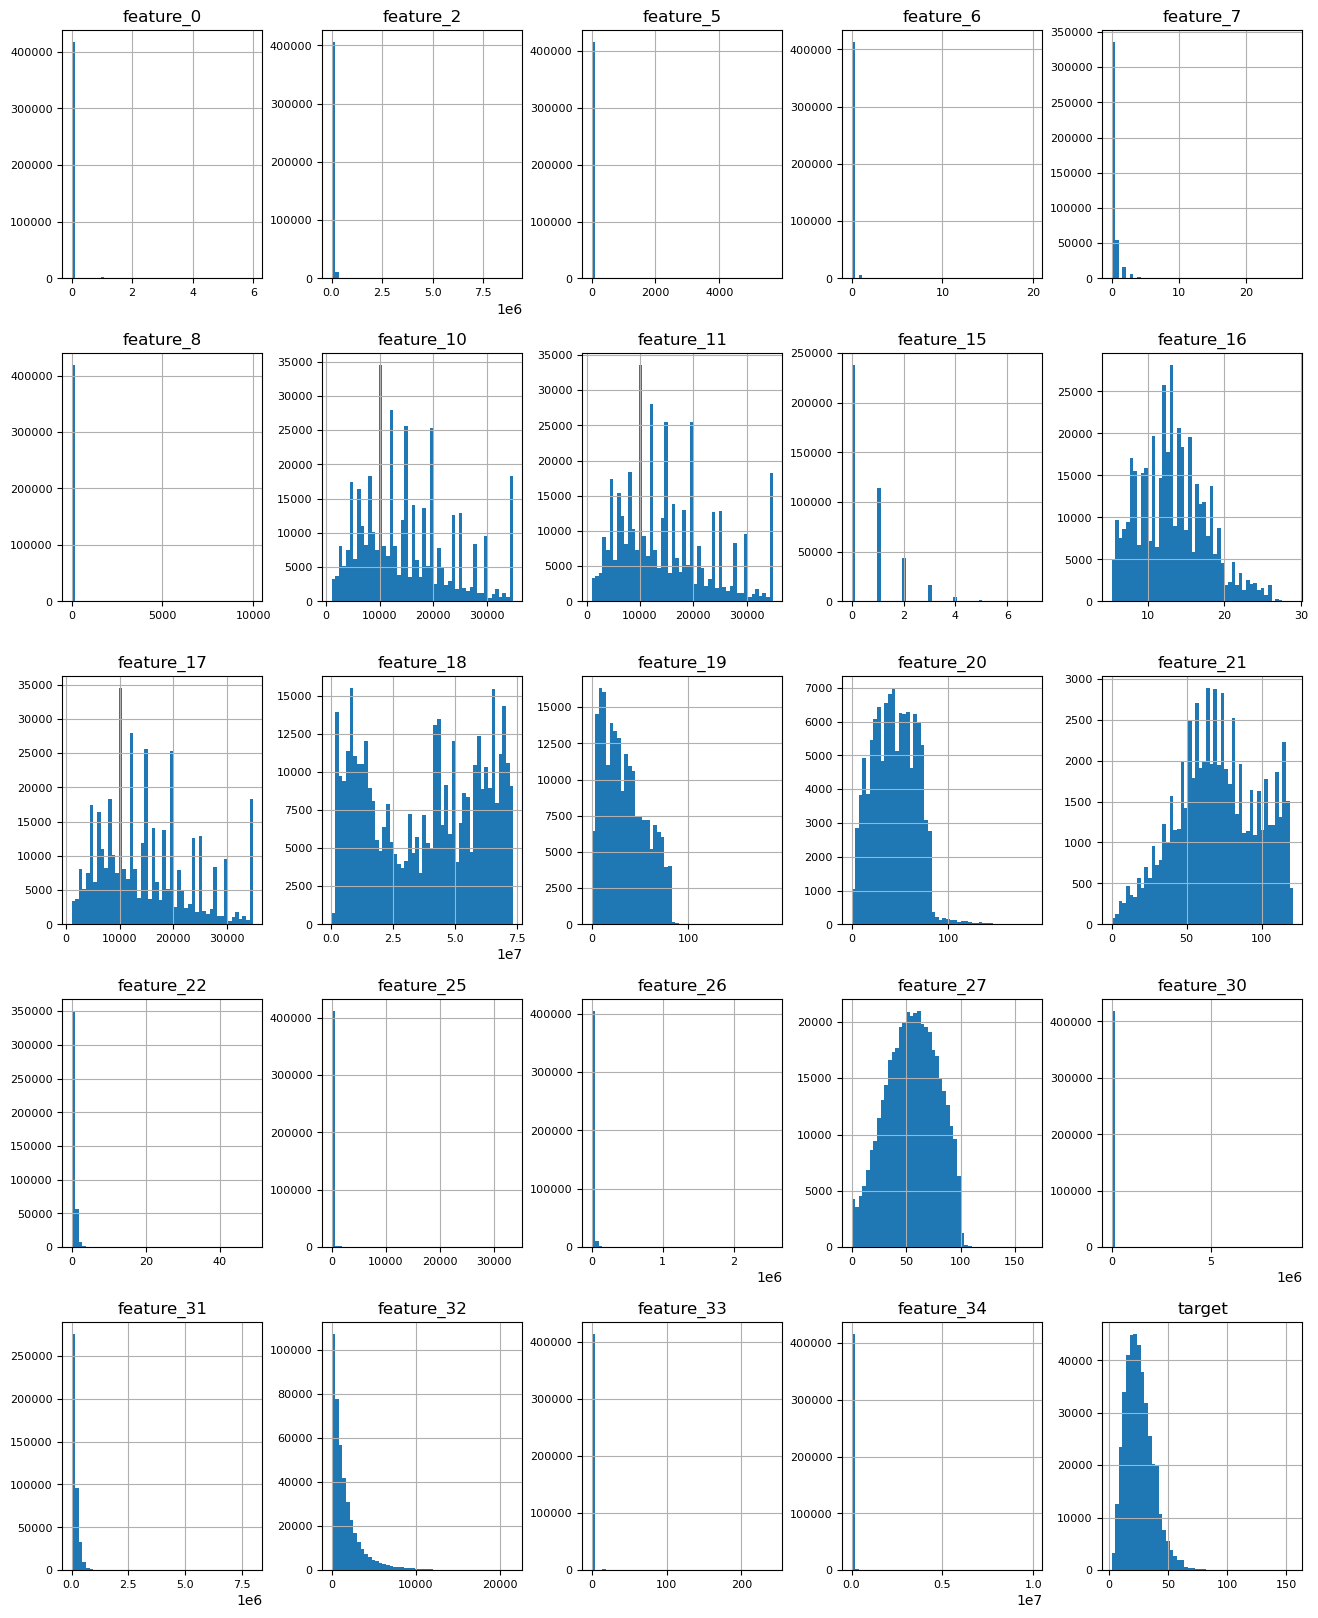

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
df.loc[df.duplicated()]

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
